In [ ]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #04 - Chaos

Purpose:
Script to examine how chaos manifests in simple model.
[PUT MORE INFORMATION HERE - I.E., WHAT SPECIFIC THING IS BEING DONE]

"""
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

In [58]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles

In [78]:
### Set constants ###
a = 0.25
b = 4.0
F = 8.0
G = 1.0

### Set initial condtions ###
x1_initial = 2.5
y1_initial = 1.0
z1_initial = 0.0

x2_initial = 2.49
y2_initial = 1.0
z2_initial = 0.0

In [79]:
### Set time step ###
dt = 4/(24*5)
tot_steps = int(120/5)/dt
tot_steps = int(tot_steps)

In [80]:
### Set empty arrays for results ###
sim_1_x = np.empty(tot_steps)
sim_1_y = np.empty(tot_steps)
sim_1_z = np.empty(tot_steps)

sim_2_x = np.empty(tot_steps)
sim_2_y = np.empty(tot_steps)
sim_2_z = np.empty(tot_steps)

### Put initial conditions into arrays ###
sim_1_x[0] = x1_initial
sim_1_y[0] = y1_initial
sim_1_z[0] = z1_initial

sim_2_x[0] = x2_initial
sim_2_y[0] = y2_initial
sim_2_z[0] = z2_initial

In [81]:
### Simulation with initial conditions (2.5, 1.0, 0.0) ###
for i in range(1, tot_steps):
    x1_dt = sim_1_x[i-1] + dt*(-sim_1_y[i-1]**2 - sim_1_z[i-1]**2 - (a*sim_1_x[i-1]) + (a*F))
    y1_dt = sim_1_y[i-1] + dt*(sim_1_x[i-1] * sim_1_y[i-1] - (b*sim_1_x[i-1]*sim_1_z[i-1]) - sim_1_y[i-1] + G)
    z1_dt = sim_1_z[i-1] + dt*((b*sim_1_x[i-1]*sim_1_y[i-1]) + (sim_1_x[i-1]*sim_1_z[i-1]) - sim_1_z[i-1])
    sim_1_x[i] = x1_dt
    sim_1_y[i] = y1_dt
    sim_1_z[i] = z1_dt

In [82]:
### Simulation with initial conditions (2.49, 1.0, 0.0) ###
for i in range(1, tot_steps):
    x2_dt = sim_2_x[i-1] + dt*(-sim_2_y[i-1]**2 - sim_2_z[i-1]**2 - (a*sim_2_x[i-1]) + (a*F))
    y2_dt = sim_2_y[i-1] + dt*(sim_2_x[i-1] * sim_2_y[i-1] - (b*sim_2_x[i-1]*sim_2_z[i-1]) - sim_2_y[i-1] + G)
    z2_dt = sim_2_z[i-1] + dt*((b*sim_2_x[i-1]*sim_2_y[i-1]) + (sim_2_x[i-1]*sim_2_z[i-1]) - sim_2_z[i-1])
    sim_2_x[i] = x2_dt
    sim_2_y[i] = y2_dt
    sim_2_z[i] = z2_dt

<function matplotlib.pyplot.show(close=None, block=None)>

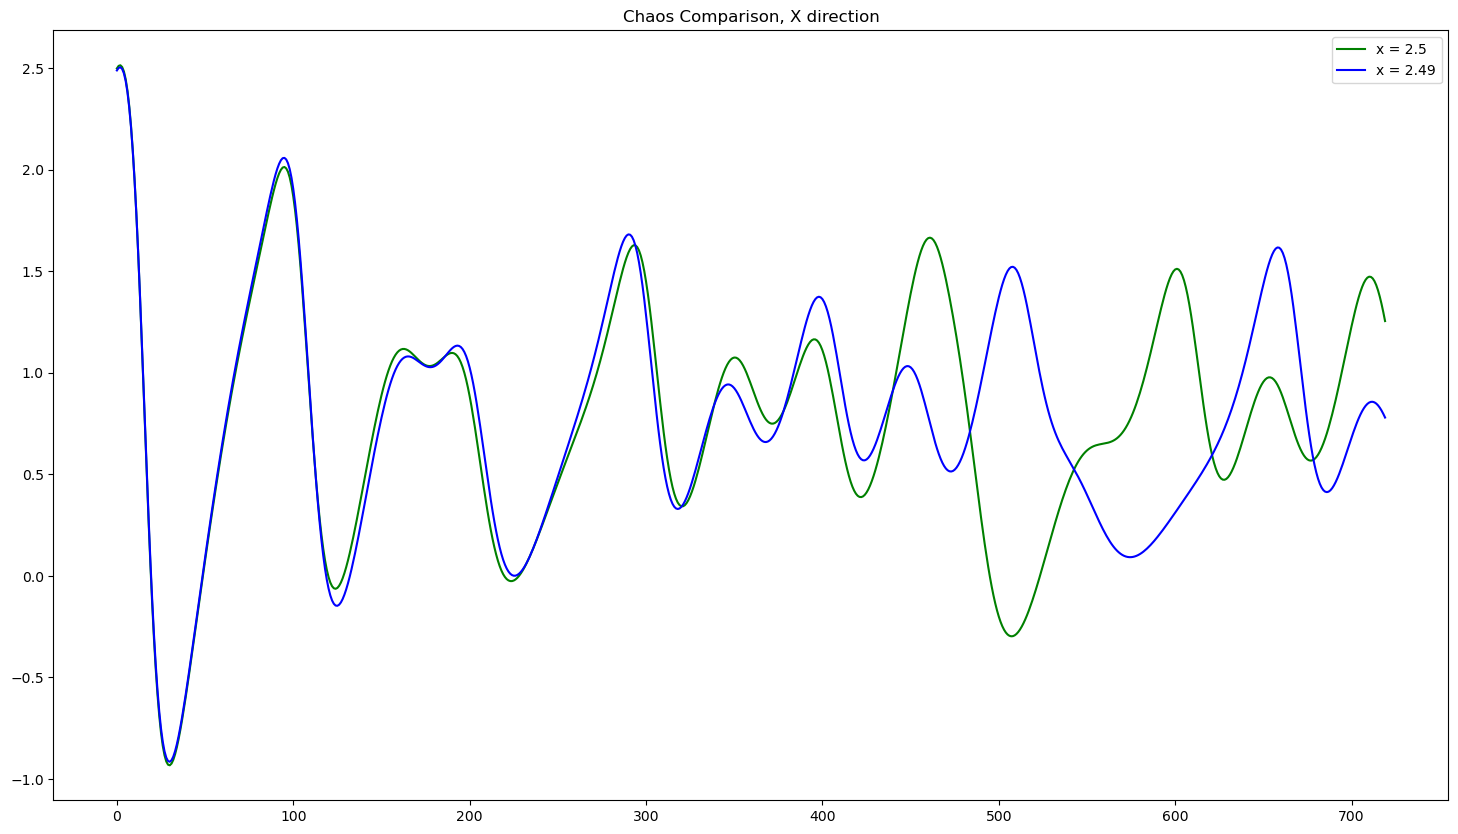

In [83]:
### Plot X results from both simulations ###
fig = plt.figure(figsize = (18,10))
plt.plot(sim_1_x[:], color = 'green', label = 'x = 2.5')
plt.plot(sim_2_x[:], color = 'blue', label = 'x = 2.49')
plt.legend()
plt.title('Chaos Comparison, X direction')
plt.savefig('chaos_x.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

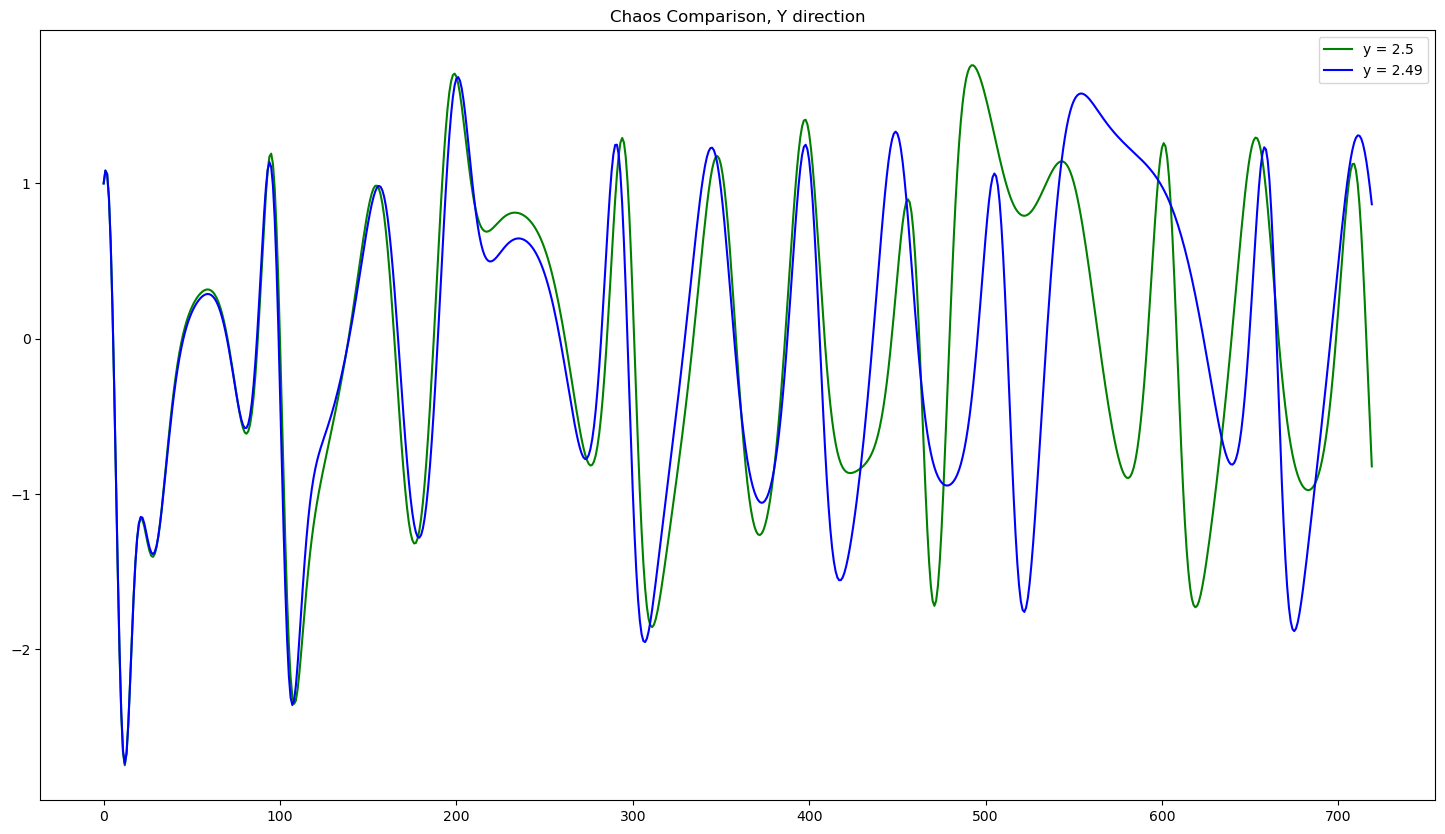

In [84]:
### Plot Y results from both simulations ###
fig = plt.figure(figsize = (18,10))
plt.plot(sim_1_y[:], color = 'green', label = 'y = 2.5')
plt.plot(sim_2_y[:], color = 'blue', label = 'y = 2.49')
plt.legend()
plt.title('Chaos Comparison, Y direction')
plt.savefig('chaos_y.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

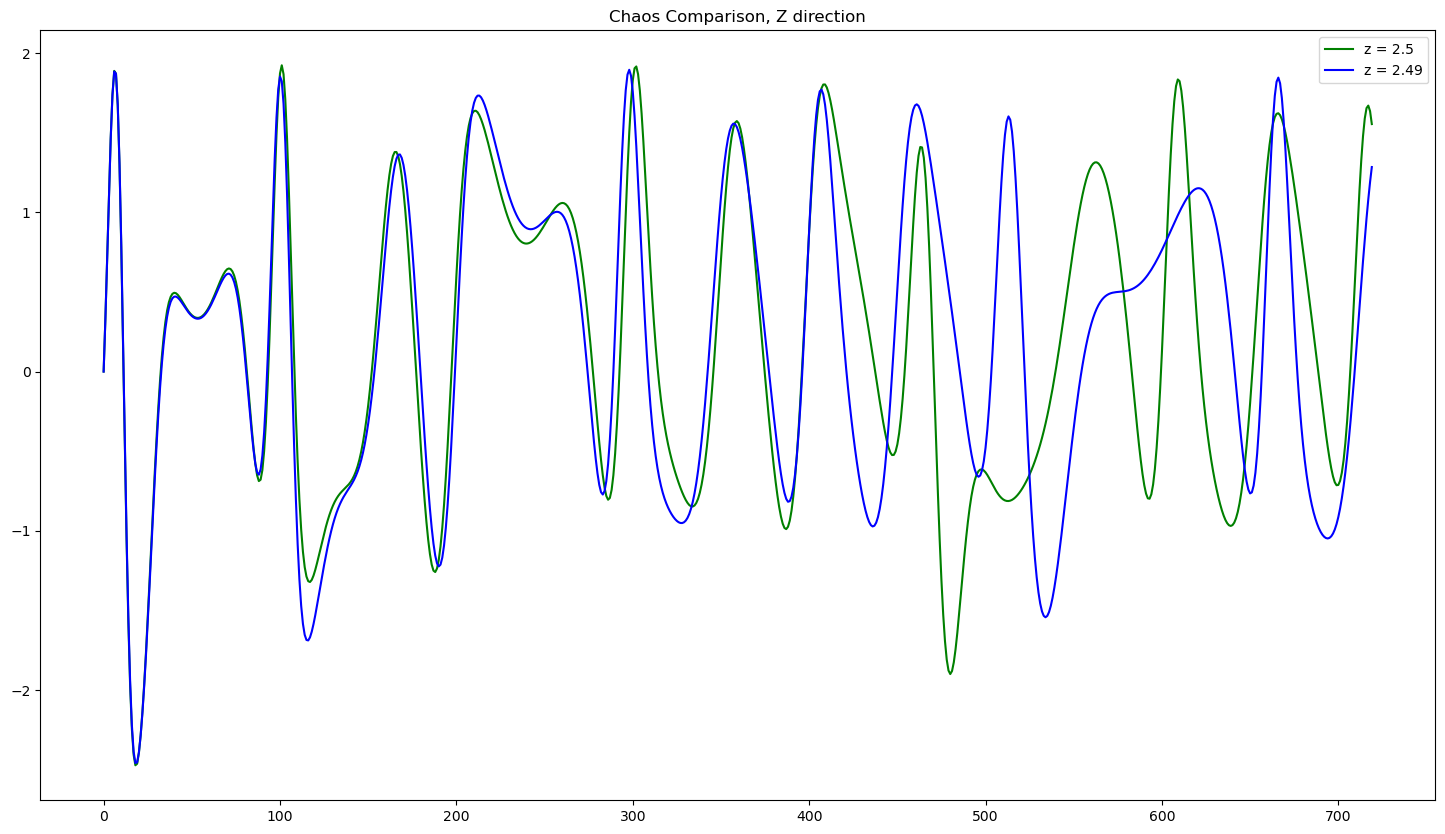

In [85]:
### Plot Z results from both simulations ###
fig = plt.figure(figsize = (18,10))
plt.plot(sim_1_z[:], color = 'green', label = 'z = 2.5')
plt.plot(sim_2_z[:], color = 'blue', label = 'z = 2.49')
plt.legend()
plt.title('Chaos Comparison, Z direction')
plt.savefig('chaos_z.png')
plt.show

In [ ]:
### In a separte text file (or below), provide a discussion of your results ###
### Make sure to answer the following questions in your discussion          ###
### 1 - Are the two simulations the same throughout the entire period?      ###
###     If not, when do they diverge?                                       ###
### 2 - If the ending points are different, what does this say regarding    ###
###     the importance of providing NWP models, assuming this serves as a   ###
###     proxy for one, with accurate and balanced initial conditions?       ###
'''
    1 - The two simulations are not the same throught the whole period, which
    makes sense. The initial conditions are different, so it makes sense that
    the graph was not the same the whole period. The graphs diverge pretty early
    on in the period, although it is difficult to tell exactly where. We can 
    clearly see that the graphs are diverging a bit as early as the 40th time 
    step or so, but again, they are diverging basically right away.
    
    2 - The ending points are pretty different, so it is clear that it is 
    important to supply NWP models with accurate and balanced initial conditions
    The only difference between the 2 models is the initial conditions, which
    are pretty similar. Just one variable is .01 off from the other, and in the
    end, there were wildly different results.

'''